In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification

In [2]:
X, y = make_moons(n_samples=1000, noise=0.3)

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, np.unique(y_train, return_counts=True)

((700, 2), (array([0, 1]), array([347, 353])))

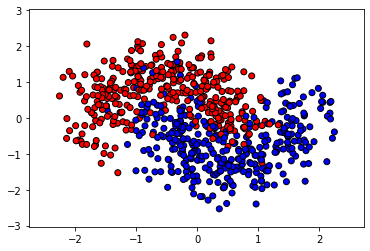

In [3]:
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
#plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [4]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

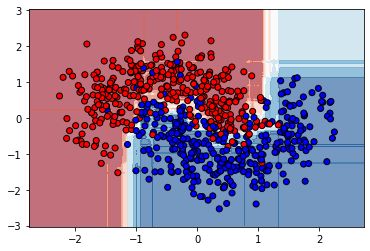

In [5]:
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()

In [6]:
from collections import defaultdict
from fatf.transparency.predictions.counterfactuals import CounterfactualExplainer

def get_counterfactuals(expl, X):
    X1 = list()
    y1 = list()
    cflinks = dict()
    cf_bytes2idx = dict()
    
    for i in range(len(X)):
        e = expl.explain_instance(X[i])
        cf_list = e[0]
        yc_list = e[2]
        cf_idx_list = list()
        for c, yc in zip(cf_list, yc_list):
            cf_bid = c.tobytes()
            if cf_bid not in cf_bytes2idx:
                cf_idx = len(X1)
                X1.append(c)
                y1.append(yc)
                cf_bytes2idx[cf_bid] = cf_idx    
            cf_idx = cf_bytes2idx[cf_bid]
            cf_idx_list.append(cf_idx)

        cflinks[i] = cf_idx_list

    X1 = np.array(X1)
    y1 = np.array(y1)
    
    return X1, y1, cflinks, cf_bytes2idx

22-Jul-12 12:20:25 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


In [7]:
expl = CounterfactualExplainer(model=clf, 
                               dataset=X_train, 
                               categorical_indices=[],
                               default_numerical_step_size=0.1
                              )

In [8]:
X0, y0 = X_train, y_train

In [9]:
X1, y1, cflinks01, _ = get_counterfactuals(expl, X0)

In [10]:
X2, y2, cflinks12, _ = get_counterfactuals(expl, X1)

In [11]:
gap1 = len(X0)
gap2 = gap1 + len(X1)

cflinks01_ = dict()
for idx0, links0 in cflinks01.items():
    cflinks01_[idx0] = [idx1 + gap1 for idx1 in links0]
cflinks01 = cflinks01_

cflinks12_ = dict()
for idx1, links2 in cflinks12.items():
    cflinks12_[idx1 + gap1] = [idx2 + gap2 for idx2 in links2]
cflinks12 = cflinks12_

In [12]:
X_ = np.concatenate([X0, X1, X2])
y_ = np.concatenate([y0, y1, y2])

In [13]:
cflinks = dict()
cflinks.update(cflinks01)
cflinks.update(cflinks12)

In [17]:
X_[0], y_[0]

(array([-0.39290244,  2.25096976]), 0)

In [18]:
X_[cflinks[0]], y_[cflinks[0]]

(array([[ 1.24753357,  2.25096976],
        [ 1.24753357,  2.27155074],
        [-0.39290244,  0.17155074]]),
 array([1, 1, 1]))

In [14]:
cflinks

{0: [700, 701, 702],
 1: [703, 704, 705],
 2: [706, 707, 708],
 3: [709, 710, 711],
 4: [712, 713, 714],
 5: [712, 715],
 6: [716, 717, 718],
 7: [719, 720, 721, 722, 723],
 8: [724, 725, 726],
 9: [727, 728, 729],
 10: [712, 730],
 11: [731, 732, 733],
 12: [734, 735, 731, 736],
 13: [737, 738, 739],
 14: [740, 741, 742],
 15: [712, 743],
 16: [731, 744, 745],
 17: [712, 746, 747],
 18: [748, 749, 750, 751],
 19: [716, 752, 753],
 20: [754, 755, 756],
 21: [757, 758, 759],
 22: [760, 761, 762],
 23: [754, 763],
 24: [712, 764],
 25: [712, 765],
 26: [766, 741, 767],
 27: [712, 768],
 28: [769, 770],
 29: [712, 771, 772],
 30: [773, 774, 757, 775],
 31: [776, 777, 778],
 32: [779, 780, 781],
 33: [757, 782, 783],
 34: [784, 785],
 35: [786, 724, 787],
 36: [788, 754, 789],
 37: [712, 790],
 38: [712, 791],
 39: [792, 793, 794],
 40: [795, 796, 797],
 41: [724, 798, 799],
 42: [731, 800, 801],
 43: [712, 802],
 44: [716, 803, 804],
 45: [712, 805],
 46: [806, 807],
 47: [808, 809, 810],

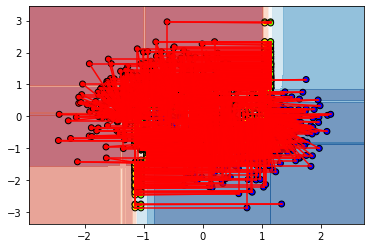

In [14]:
cm_cf = ListedColormap(["gold", "lawngreen"])  # "darkorange", "gold", "lawngreen", "lightseagreen"
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6)
plt.scatter(X_[:len(X0), 0], X_[:len(X0), 1], c=y_[:len(X0)], cmap=cm_bright, edgecolors="k")
plt.scatter(X_[len(X0):, 0], X_[len(X0):, 1], c=y_[len(X0):], cmap=cm_cf, edgecolors="k")

for i in cflinks:
    links = cflinks[i]
    for j in links:
        plt.plot(np.array([X_[i,0], X_[j,0]]),
                 np.array([X_[i,1], X_[j,1]]),
                 c='r')

        
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

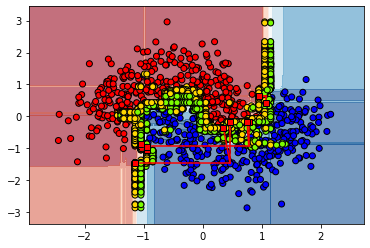

In [15]:
cm_cf = ListedColormap(["gold", "lawngreen"])  # "darkorange", "gold", "lawngreen", "lightseagreen"
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6)
plt.scatter(X_[:len(X0), 0], X_[:len(X0), 1], c=y_[:len(X0)], cmap=cm_bright, edgecolors="k")
plt.scatter(X_[len(X0):, 0], X_[len(X0):, 1], c=y_[len(X0):], cmap=cm_cf, edgecolors="k")

idx2plot = [19, 100, 431, 702]
for i in idx2plot:
    links = cflinks[i]
    for j in links:
        plt.plot(np.array([X_[i,0], X_[j,0]]),
                 np.array([X_[i,1], X_[j,1]]),
                 c='r', marker='s', markevery=[1], markeredgecolor="k")

        
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [16]:
from scipy.spatial.distance import pdist, cdist, squareform

def get_tomeklinks(X, y, k=1):
    tomeklinks = dict()
    distances = dict()
    idx = np.arange(len(X))
    for l in np.unique(y):
        idx_l = idx[y == l]
        idx_nl = idx[y != l]
        D = cdist(X[idx_l], X[idx_nl])
        #c_idx = np.argmin(D, axis=1)
        c_idx = np.argsort(D, axis=1)[:,:k]
        #for i, tmk in zip(idx_l, idx_nl[c_idx]):
        for j in range(len(idx_l)):
            i = idx_l[j]
            tmk = idx_nl[c_idx][j]
            tomeklinks[i] = tmk.tolist()
            distances[i] = D[j, c_idx[j]]
            
        
    return tomeklinks, distances

In [17]:
tmklinks, distances = get_tomeklinks(X_, y_, k=3)

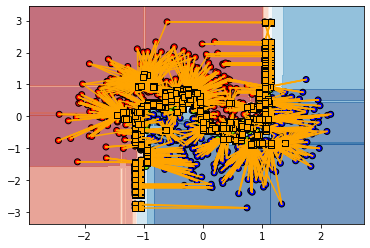

In [18]:
cm_cf = ListedColormap(["gold", "lawngreen"])  # "darkorange", "gold", "lawngreen", "lightseagreen"
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6)
plt.scatter(X_[:len(X0), 0], X_[:len(X0), 1], c=y_[:len(X0)], cmap=cm_bright, edgecolors="k")
plt.scatter(X_[len(X0):, 0], X_[len(X0):, 1], c=y_[len(X0):], cmap=cm_cf, edgecolors="k")

for i in tmklinks:
    links = tmklinks[i]
    for j in links:
        plt.plot(np.array([X_[i,0], X_[j,0]]),
                 np.array([X_[i,1], X_[j,1]]),
                 c='orange', marker='s', markevery=[1], markeredgecolor="k")

        
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

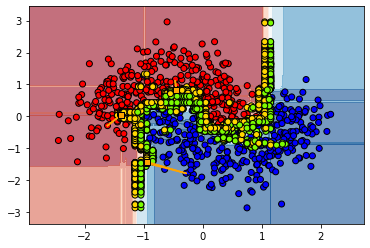

In [19]:
cm_cf = ListedColormap(["gold", "lawngreen"])  # "darkorange", "gold", "lawngreen", "lightseagreen"
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6)
plt.scatter(X_[:len(X0), 0], X_[:len(X0), 1], c=y_[:len(X0)], cmap=cm_bright, edgecolors="k")
plt.scatter(X_[len(X0):, 0], X_[len(X0):, 1], c=y_[len(X0):], cmap=cm_cf, edgecolors="k")

idx2plot = [1, 5, 6] #, 100, 431, 702]
for i in idx2plot:
    links = tmklinks[i]
    for j in links:
        plt.plot(np.array([X_[i,0], X_[j,0]]),
                 np.array([X_[i,1], X_[j,1]]),
                 c='orange', marker='s', markevery=[1], markeredgecolor="k")

        
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [20]:
def get_reverse_cflinks(cflinks):
    reverse_cflinks = defaultdict(set)
    for i, links in cflinks.items():
        for j in links:
            reverse_cflinks[j].add(i)
    for j, links in reverse_cflinks.items():
        reverse_cflinks[j] = sorted(list(links))
    reverse_cflinks = dict(reverse_cflinks)
    return reverse_cflinks

In [21]:
reverse_tmklinks = get_reverse_cflinks(tmklinks)

In [22]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, cdist, squareform

def _clean_cflinks(x, cflinks_x, X, dist_thr=0.1, dir_thr=0.01):
    idx = np.arange(len(X))
    dbscan_d = DBSCAN(eps=dist_thr, min_samples=2)
    dbscan_d.fit(X[cflinks_x])

    points_idx_to_keep = list()
    for c_id in np.unique(dbscan_d.labels_):

        idx_cluster = idx[cflinks_x][dbscan_d.labels_ == c_id]
        if c_id == -1:
            points_idx_to_keep.extend(idx_cluster) 

        else:
            directions = X[x] - X[idx_cluster] + 0.00001
            C = squareform(pdist(directions, metric='cosine'))
            dbscan_c = DBSCAN(eps=dir_thr, min_samples=2, metric='precomputed')
            dbscan_c.fit(C)
            
            for c2_id in np.unique(dbscan_c.labels_):
                idx_cluster2 = idx[idx_cluster][dbscan_c.labels_ == c2_id]
                if c2_id == -1:
                    points_idx_to_keep.extend(idx_cluster2) 
                else:
                    dist = cdist(X[[x]], X[idx_cluster2])
                    idx_closest = idx_cluster2[np.argmin(dist)]
                    points_idx_to_keep.append(idx_closest)

    c_cflinks_x = sorted(points_idx_to_keep)
    return c_cflinks_x


def clean_cflinks(cflinks, X, dist_thr=0.1, dir_thr=0.01):
    c_cflinks = dict()
    for x in cflinks:
        cflinks_x = cflinks[x]
        c_cflinks[x] = _clean_cflinks(x, cflinks_x, X, dist_thr, dir_thr)

    return c_cflinks

In [23]:
c_reverse_tmklinks = clean_cflinks(reverse_tmklinks, X_, dist_thr=1, dir_thr=0.1)

In [24]:
def get_cleaned_cflinks(c_reverse_cflinks):
    c_cflinks = defaultdict(list)
    for j in c_reverse_cflinks:
        for i in c_reverse_cflinks[j]:
            c_cflinks[i].append(j)
    c_cflinks = dict(c_cflinks)
    
    return c_cflinks

In [25]:
c_tmklinks = get_cleaned_cflinks(c_reverse_tmklinks)

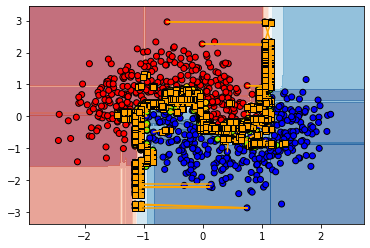

In [26]:
cm_cf = ListedColormap(["gold", "lawngreen"])  # "darkorange", "gold", "lawngreen", "lightseagreen"
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6)
plt.scatter(X_[:len(X0), 0], X_[:len(X0), 1], c=y_[:len(X0)], cmap=cm_bright, edgecolors="k")
plt.scatter(X_[len(X0):, 0], X_[len(X0):, 1], c=y_[len(X0):], cmap=cm_cf, edgecolors="k")

for i in c_tmklinks:
    links = c_tmklinks[i]
    for j in links:
        plt.plot(np.array([X_[i,0], X_[j,0]]),
                 np.array([X_[i,1], X_[j,1]]),
                 c='orange', marker='s', markevery=[1], markeredgecolor="k")

        
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [27]:
idx = list(c_tmklinks.keys())

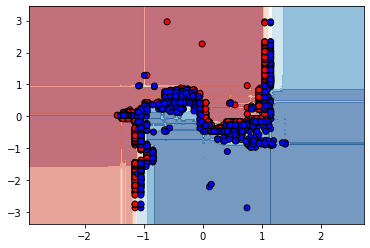

In [28]:
cm_cf = ListedColormap(["gold", "lawngreen"])  # "darkorange", "gold", "lawngreen", "lightseagreen"
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6)
plt.scatter(X_[idx, 0], X_[idx, 1], c=y_[idx], cmap=cm_bright, edgecolors="k")

        
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [29]:
#distances_c = dict()
D_cf = np.zeros((len(idx), 3))
for j, i in enumerate(idx):
    #distances_c[i] = distances[i]
    D_cf[j] = distances[i]

In [30]:
D_sc = np.zeros((len(idx), 3))
for j, i in enumerate(idx):
    dist = cdist(X_[[i]], X_[idx][y_[i] == y_[idx]])[0]
    idx_closest = np.argsort(dist)[1:3+1]
    D_sc[j] = dist[idx_closest]

In [31]:
D = np.concatenate([D_cf, D_sc], axis=1)
D.shape

(1783, 6)

In [32]:
from scipy.stats import iqr
from sklearn.ensemble import IsolationForest

k_iqr = 3
outlier_iter = 10
is_outlier = np.zeros((len(D), outlier_iter))

for iter_id in range(outlier_iter):
    isof = IsolationForest(n_estimators=100, random_state=iter_id)
    labels = isof.fit_predict(D)
    scores = isof.score_samples(D)
    
    iqr_val = iqr(scores)
    q1 = np.quantile(scores, q=0.25)
    q3 = np.quantile(scores, q=0.75)
    
    for i, x in enumerate(scores):
        if x < q1 - k_iqr * iqr_val or x > q3 + k_iqr * iqr_val:
            is_outlier[i][iter_id] = 1.0
            
#is_outlier = np.round(np.mean(is_outlier, axis=1))
is_outlier = np.round(np.percentile(is_outlier, 75, axis=1))

In [33]:
np.unique(is_outlier, return_counts=True)

(array([0., 1.]), array([1776,    7]))

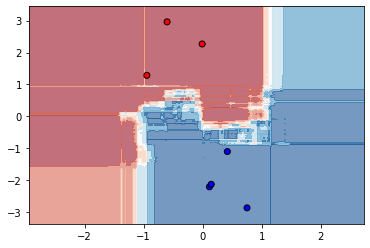

In [34]:
cm_cf = ListedColormap(["gold", "lawngreen"])  # "darkorange", "gold", "lawngreen", "lightseagreen"
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6)
idx = np.array(list(c_tmklinks.keys()))
plt.scatter(X_[idx][is_outlier==1, 0], X_[idx][is_outlier==1, 1], c=y_[idx][is_outlier==1], 
            cmap=cm_bright, edgecolors="k")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

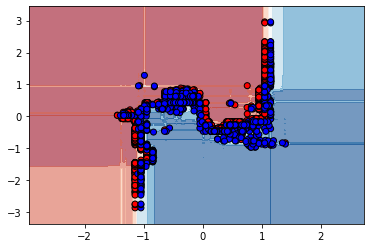

In [35]:
cm_cf = ListedColormap(["gold", "lawngreen"])  # "darkorange", "gold", "lawngreen", "lightseagreen"
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6)
idx = np.array(list(c_tmklinks.keys()))
plt.scatter(X_[idx][is_outlier==0, 0], X_[idx][is_outlier==0, 1], c=y_[idx][is_outlier==0], 
            cmap=cm_bright, edgecolors="k")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [36]:
import heapq
from sklearn.cluster import KMeans

class BisectingKMeans:
    
    def __init__(
            self,
            k=2,
            min_cluster_size=1,
            min_split_size=2,
            max_distance_thr=0.0,
            max_nbr_clusters_iter=100,
            max_iter=300,
            random_state=None
        ):
        
        self.k = k
        self.min_cluster_size = min_cluster_size
        self.min_split_size = min_split_size
        self.max_distance_thr = max_distance_thr
        self.max_nbr_clusters_iter = max_nbr_clusters_iter
        self.max_iter = max_iter
        self.random_state = random_state

        self.labels_ = None
        self.cluster_centers_ = None
        self.sse_ = None
        self.sse_list_ = None
        self.sse_history_ = None
        self.n_iter_ = None

    def fit(self, X):

        self.labels_ = -np.ones(len(X)).astype(int)
        self.cluster_centers_ = list()
        self.sse_list_ = list()
        self.sse_history_ = list()
        self.n_iter_ = 0

        queue = list()
        heapq.heappush(queue, (-len(X), np.arange(len(X))))

        nbr_clusters = 0
        for i in range(self.max_iter):
            #print('iter', i, len(queue), nbr_clusters)
            
            if len(queue) == 0:
                break
            
            indexes = heapq.heappop(queue)[1]
            X_it = X[indexes]
            #print(len(X_it), len(X), type(indexes))

            kmeans = KMeans(n_clusters=self.k)
            kmeans.fit(X_it)
            
            _, sizes = np.unique(kmeans.labels_, return_counts=True)
            if np.any(sizes < self.min_cluster_size):
                continue
            
            self.labels_[indexes] = kmeans.labels_ + nbr_clusters

            self.sse_history_.append(kmeans.inertia_)
            nbr_clusters += self.k

            for j in range(self.k):
                C_j = X[indexes[kmeans.labels_ == j]]
                #print(j, len(C_j), '<----')
                
                cluster_sse = np.sum(cdist(np.array([kmeans.cluster_centers_[j]]), C_j))
                cluster_sse += np.random.random()*0.000001
                
                if self.max_distance_thr > 0.0:
                    max_intra_cluster_dist = np.max(pdist(C_j))
                else:
                    max_intra_cluster_dist = np.inf
                
                if len(C_j) <= self.min_split_size or max_intra_cluster_dist <= self.max_distance_thr: # if a cluster must not be split anymore
                    self.cluster_centers_.append(kmeans.cluster_centers_[j])
                    self.sse_list_.append(cluster_sse)
                else:
                    heapq.heappush(queue, (-cluster_sse, indexes[kmeans.labels_ == j]))

            if len(queue) == 0 or nbr_clusters >= self.max_nbr_clusters_iter:
                break

            self.n_iter_ = i

        self.sse_ = np.sum(self.sse_list_)
        self.cluster_centers_ = np.array(self.cluster_centers_)

    def fit_predict(self, X):
        self.fit(X)
        return self.labels_

In [37]:
Xc = X_[idx][is_outlier==0]
yc = y_[idx][is_outlier==0]

In [38]:
idx_c = [x for x in idx[is_outlier==0]]

In [39]:
bkmeans = BisectingKMeans(min_cluster_size=3, min_split_size=5)
bkmeans.fit(Xc)
labels = bkmeans.labels_
np.unique(labels, return_counts=True)

(array([39, 42, 45, 47, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 63,
        64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82,
        83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([37, 47, 23, 24, 37, 66, 62, 61, 33, 40, 33, 24, 54, 37, 56, 38,  6,
        35, 29, 60, 42, 27, 39, 13, 31, 45, 36,  4, 49, 42, 57, 28,  5, 24,
        60, 19, 15, 43, 48, 26, 27,  6, 28, 48, 40, 11, 35, 37, 33, 15, 41]))

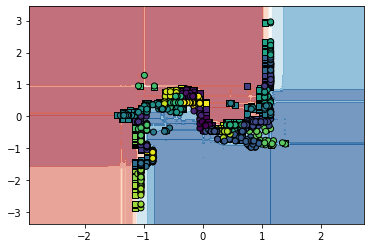

In [40]:
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6)
plt.scatter(Xc[yc==0, 0], Xc[yc==0, 1], c=labels[yc==0], marker='s', edgecolors="k")
plt.scatter(Xc[yc==1, 0], Xc[yc==1, 1], c=labels[yc==1], marker='o', edgecolors="k")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [41]:
D = np.zeros((len(idx_c), 3))
for j, i in enumerate(idx_c):
    D[j] = distances[i]

In [182]:
D_cf = np.zeros((len(idx_c), 3))
for j, i in enumerate(idx_c):
    D_cf[j] = distances[i]
    
D_sc = np.zeros((len(idx_c), 3))
for j, i in enumerate(idx_c):
    dist = cdist(X_[[i]], X_[idx_c][y_[i] == y_[idx_c]])[0]
    idx_closest = np.argsort(dist)[1:3+1]
    D_sc[j] = dist[idx_closest]
    
D = np.concatenate([D_cf, D_sc], axis=1)
D.shape

(1776, 6)

In [303]:
bkmeans = BisectingKMeans(min_cluster_size=3, min_split_size=5)
bkmeans.fit(np.concatenate([Xc, D], axis=1))
labels = bkmeans.labels_
label, size = np.unique(labels, return_counts=True)

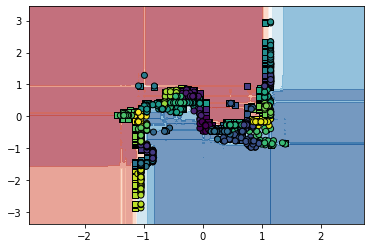

In [308]:
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6)
plt.scatter(Xc[yc==0, 0], Xc[yc==0, 1], c=labels[yc==0], marker='s', edgecolors="k")
plt.scatter(Xc[yc==1, 0], Xc[yc==1, 1], c=labels[yc==1], marker='o', edgecolors="k")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [326]:
for l, s in zip(label, size):
    counts = np.unique(yc[labels==l], return_counts=True) 
    if np.max(counts) / np.sum(counts) > 0.7:
        continue
    print(l, s, counts)

43 47 (array([0, 1]), array([19, 28]))
45 24 (array([0, 1]), array([14, 10]))
48 37 (array([0, 1]), array([23, 14]))
49 70 (array([0, 1]), array([21, 49]))
50 66 (array([0, 1]), array([38, 28]))
51 64 (array([0, 1]), array([32, 32]))
52 31 (array([0, 1]), array([13, 18]))
54 24 (array([0, 1]), array([ 9, 15]))
55 35 (array([0, 1]), array([10, 25]))
56 10 (array([0, 1]), array([6, 4]))
59 6 (array([0, 1]), array([2, 4]))
60 85 (array([0, 1]), array([38, 47]))
62 56 (array([0, 1]), array([27, 29]))
63 38 (array([0, 1]), array([24, 14]))
64 5 (array([0, 1]), array([2, 3]))
66 47 (array([0, 1]), array([23, 24]))
67 42 (array([0, 1]), array([21, 21]))
68 36 (array([0, 1]), array([18, 18]))
69 4 (array([0, 1]), array([2, 2]))
70 39 (array([0, 1]), array([20, 19]))
71 27 (array([0, 1]), array([13, 14]))
73 13 (array([0, 1]), array([4, 9]))
74 44 (array([0, 1]), array([31, 13]))
75 31 (array([0, 1]), array([17, 14]))
79 57 (array([0, 1]), array([37, 20]))
80 19 (array([0, 1]), array([ 5, 14]))

(array([0, 1]), array([14, 14]))


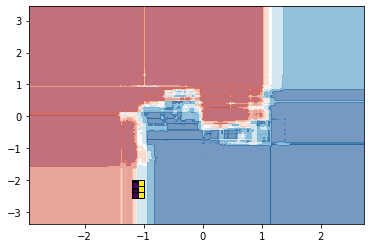

In [330]:
cluster_id = 92

plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6)
plt.scatter(Xc[labels==cluster_id, 0], Xc[labels==cluster_id, 1], c=yc[labels==cluster_id], 
            marker='s', edgecolors="k")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
print(np.unique(yc[labels==cluster_id], return_counts=True))

plt.show()

In [335]:
cl_svm = LinearSVC(C=1, dual=False)
cl_svm.fit(Xc[labels==cluster_id], yc[labels==cluster_id])

LinearSVC(C=1, dual=False)

28
24
28 24


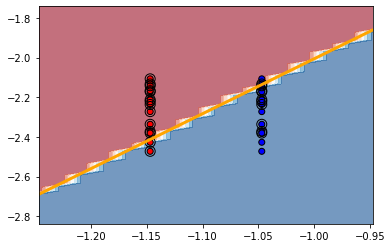

In [336]:
X_leaf = Xc[labels==cluster_id]
y_leaf = yc[labels==cluster_id]

thr = 1 + 1e-15

decision_function = cl_svm.decision_function(X_leaf)
print(len(decision_function))
decision_function = decision_function[cl_svm.predict(X_leaf) == y_leaf]
print(len(decision_function))
support_vector_indices = np.where(np.abs(decision_function) <= thr)[0]
support_vectors = X_leaf[support_vector_indices]
y_sv = yc[support_vector_indices]
print(len(X_leaf), len(support_vectors))

Z_ldt = cl_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_ldt = Z_ldt.reshape(xx.shape)

plt.contourf(xx, yy, Z_ldt, cmap=cm, alpha=0.6)
plt.scatter(X_leaf[:, 0], X_leaf[:, 1], c=y_leaf, cmap=cm_bright, edgecolors="k")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

eps_x = np.abs(np.max(X_leaf[:,0])-np.min(X_leaf[:,0]))# * 0.5
eps_y = np.abs(np.max(X_leaf[:,1])-np.min(X_leaf[:,1]))# * 0.5

xx_svm, yy_svm = np.meshgrid(
    np.linspace(np.min(X_leaf[:,0])-eps_x, np.max(X_leaf[:,0])+eps_x, 50), 
    np.linspace(np.min(X_leaf[:,1])-eps_y, np.max(X_leaf[:,1])+eps_y, 50)
    )
Z_svm = cl_svm.decision_function(np.c_[xx_svm.ravel(), yy_svm.ravel()])
Z_svm = Z_svm.reshape(xx_svm.shape)
plt.contour(
        xx_svm,
        yy_svm,
        Z_svm,
        colors="orange",
        levels=[-1, 0, 1],
        #alpha=0.5,
        linewidths=3,
        linestyles=["--", "-", "--"],
    )
plt.scatter(
    support_vectors[:, 0],
    support_vectors[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.xlim(np.min(X_leaf[:,0])-eps_x, np.max(X_leaf[:,0])+eps_x)
plt.ylim(np.min(X_leaf[:,1])-eps_y, np.max(X_leaf[:,1])+eps_y)
plt.show()

In [299]:
cl_svm.predict(X_leaf) == y_leaf

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False])

In [295]:
cl_svm.predict(X_leaf)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [65]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from lineartree import LinearTreeClassifier

In [155]:
ldt = LinearTreeClassifier(base_estimator=LinearSVC(),
                           criterion='hamming',
                           max_depth=4,
                           min_samples_leaf=3,
                           min_samples_split=6,
                           max_bins=25
                          )
ldt.fit(X_, y_)

LinearTreeClassifier(base_estimator=LinearSVC(), max_depth=4,
                     min_samples_leaf=3)

In [349]:
ldt = LinearTreeClassifier(base_estimator=LogisticRegression(), 
                            criterion='crossentropy',
                            max_depth=6,
                            min_samples_leaf=3,
                            min_samples_split=6,
                            max_bins=25
                           )
ldt.fit(Xc, yc)

LinearTreeClassifier(base_estimator=LogisticRegression(),
                     criterion='crossentropy', max_depth=6, min_samples_leaf=3)

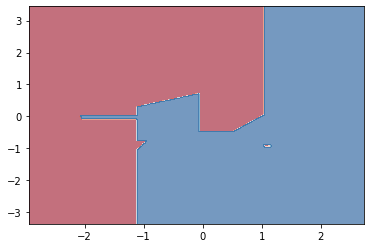

In [348]:
Z_ldt = ldt.predict(np.c_[xx.ravel(), yy.ravel()])
Z_ldt = Z_ldt.reshape(xx.shape)

plt.contourf(xx, yy, Z_ldt, cmap=cm, alpha=0.6)
#plt.scatter(Xc[:, 0], Xc[:, 1], c=yc, cmap=cm_bright, edgecolors="k")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()

In [ ]:
# ldt.summary(only_leaves=True).keys()

In [177]:
leaf_idx = 15
record_leaf_idx = ldt.apply(Xc) == leaf_idx
X_leaf = Xc[record_leaf_idx]
y_leaf = yc[record_leaf_idx]
svm = ldt.summary(only_leaves=True)[leaf_idx]['models']
#thr = 0.1 #1 + 1e-15
thr = 1 + 1e-15
#thr = np.percentile(np.abs(decision_function), 10)
print(svm)

LinearSVC()


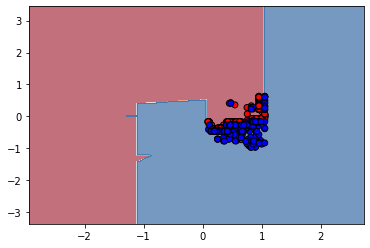

In [178]:
Z_ldt = ldt.predict(np.c_[xx.ravel(), yy.ravel()])
Z_ldt = Z_ldt.reshape(xx.shape)

plt.contourf(xx, yy, Z_ldt, cmap=cm, alpha=0.6)
plt.scatter(X_leaf[:, 0], X_leaf[:, 1], c=y_leaf, cmap=cm_bright, edgecolors="k")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()

In [179]:
decision_function = svm.decision_function(X_leaf)
#decision_function = np.dot(X_leaf, svm.coef_[0]) + svm.intercept_[0]
# we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
support_vector_indices = np.where(np.abs(decision_function) <= thr)[0]
support_vectors = X_leaf[support_vector_indices]
y_sv = yc[support_vector_indices]
print(len(X_leaf), len(support_vectors))

469 469


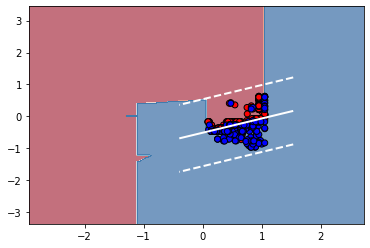

In [180]:
Z_ldt = ldt.predict(np.c_[xx.ravel(), yy.ravel()])
Z_ldt = Z_ldt.reshape(xx.shape)

plt.contourf(xx, yy, Z_ldt, cmap=cm, alpha=0.6)
plt.scatter(X_leaf[:, 0], X_leaf[:, 1], c=y_leaf, cmap=cm_bright, edgecolors="k")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


eps_x = np.abs(np.max(X_leaf[:,0])-np.min(X_leaf[:,0])) * 0.5
eps_y = np.abs(np.max(X_leaf[:,1])-np.min(X_leaf[:,1])) * 0.5

xx_svm, yy_svm = np.meshgrid(
    np.linspace(np.min(X_leaf[:,0])-eps_x, np.max(X_leaf[:,0])+eps_x, 50), 
    np.linspace(np.min(X_leaf[:,1])-eps_y, np.max(X_leaf[:,1])+eps_y, 50)
    )
Z_svm = svm.decision_function(np.c_[xx_svm.ravel(), yy_svm.ravel()])
Z_svm = Z_svm.reshape(xx_svm.shape)
plt.contour(
        xx_svm,
        yy_svm,
        Z_svm,
        colors="w",
        levels=[-1, 0, 1],
        #alpha=0.5,
        linewidths=2,
        linestyles=["--", "-", "--"],
    )


plt.show()